## Stack-LSTM Deep Learning Model for predicting Stock Trend

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [6]:
start_date = '2010-01-01'
end_date = '2024-12-31'
symbol = 'MSFT'

data = yf.download(symbol, start=start_date, end=end_date)
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                            
2010-01-04  23.347317  23.460470  23.075748  23.098379  38409100
2010-01-05  23.354866  23.460477  23.113472  23.271888  49749600
2010-01-06  23.211533  23.445383  23.022944  23.294511  58182400
2010-01-07  22.970142  23.158731  22.774010  23.105925  50559700
2010-01-08  23.128553  23.294511  22.811724  22.841899  51197400


In [7]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-12-23,435.250000,437.649994,432.829987,436.739990,19152500
2024-12-24,439.329987,439.600006,434.190002,434.649994,7164500
2024-12-26,438.109985,440.940002,436.630005,439.079987,8194200
2024-12-27,430.529999,435.220001,426.350006,434.600006,18117700
2024-12-30,424.829987,427.549988,421.899994,426.059998,13158700


In [8]:
# resetting the index
data = data.reset_index()

# removing unecessary columns
data = data.drop(['Date'],axis= 1 )

C:\Users\Asus\AppData\Local\Temp\ipykernel_30840\3285981117.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(['Date'],axis= 1 )


In [9]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
0,23.347317,23.460470,23.075748,23.098379,38409100
1,23.354866,23.460477,23.113472,23.271888,49749600
2,23.211533,23.445383,23.022944,23.294511,58182400
3,22.970142,23.158731,22.774010,23.105925,50559700
4,23.128553,23.294511,22.811724,22.841899,51197400


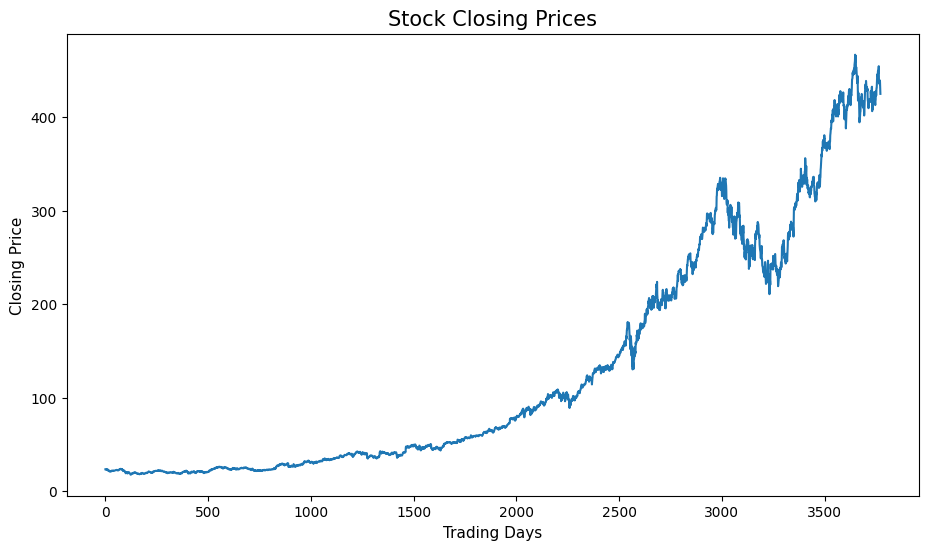

In [10]:
# Plot closing price
plt.figure(figsize=(11,6))
plt.title('Stock Closing Prices',fontsize = 15)
plt.xlabel('Trading Days',fontsize = 11)
plt.ylabel('Closing Price',fontsize = 11)
plt.plot(data.Close)

In [11]:
#Finding 100 Days Moving Average (MA)
#Finding mean of previous 100 closing values

moving_avg100 = data.Close.rolling(100).mean()
moving_avg100

Ticker,MSFT
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3768,422.430165
3769,422.745914
3770,423.182624
3771,423.499013


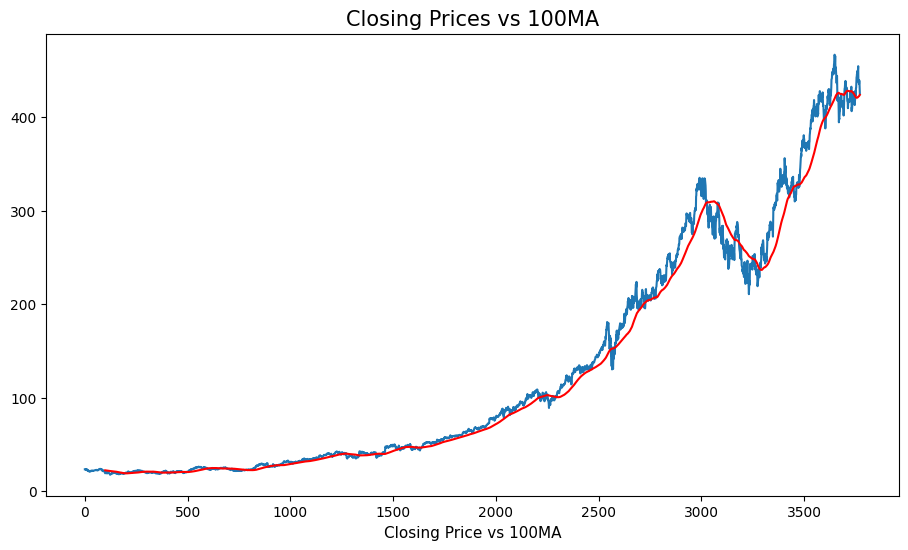

In [12]:
#Plotting Closing Prices vs 100MA

plt.figure(figsize=(11,6))
plt.title('Closing Prices vs 100MA',fontsize = 15)
plt.xlabel('Closing Price vs 100MA',fontsize = 11)
plt.plot(data.Close)
plt.plot(moving_avg100, 'red')


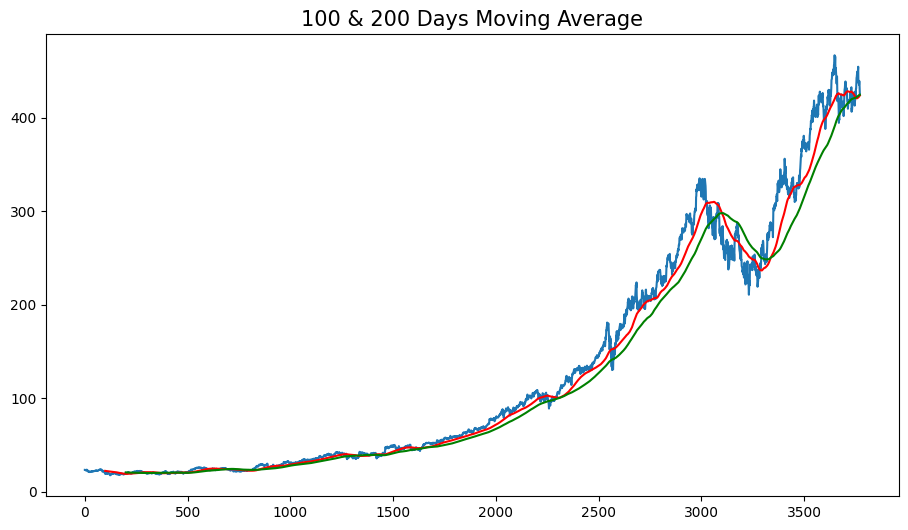

In [13]:
#Plotting 100 and 200 days moving days

moving_avg200 = data.Close.rolling(200).mean()
plt.figure(figsize=(11,6))
plt.title('100 & 200 Days Moving Average',fontsize=15)
plt.plot(data.Close)
plt.plot(moving_avg100, 'red')
plt.plot(moving_avg200, 'green')

In [14]:
data.shape

(3773, 5)

In [15]:
# Splitting the dataset into training and testing data

data_training = pd.DataFrame(data['Close'][0: int(len(data) * 0.7)])
data_testing  = pd.DataFrame(data['Close'][int(len(data)*0.7) : int(len(data))])

data_training.head()

Ticker,MSFT
0,23.347317
1,23.354866
2,23.211533
3,22.970142
4,23.128553


In [17]:
data_testing.head()

Ticker,MSFT
2641,197.268234
2642,198.771576
2643,203.050369
2644,200.689316
2645,205.103043


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)

In [20]:
data_training_array

array([[0.03264053],
       [0.0326828 ],
       [0.03188028],
       ...,
       [0.96125888],
       [0.97264386],
       [1.        ]])

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
#LSTM Model

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [23]:
# Creating a Sequential model and add layers

model = Sequential()
model.add(LSTM(units=50, activation= 'relu' , return_sequences= True, input_shape= (x_train.shape[1],1) ))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1)) # connect all the layers

c:\Users\Asus\OneDrive\Desktop\python\DataAnalyst\python_practice1\venvPy\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit( x_train, y_train, epochs=50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 157ms/step - loss: 0.0362
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - loss: 0.0044
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - loss: 0.0037
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - loss: 0.0033
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0025
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - loss: 0.0029
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 157ms/step - loss: 0.0027
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - loss: 0.0033
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - loss: 0.0026
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - loss: 0.0027
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - loss: 0.0019
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - loss: 0.0021
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step - loss: 0.0026
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - loss: 0.0019
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [26]:
# Saving the model for my Streamlit application
model.save('keras_stock_trend_prediction_model.keras')

In [27]:
#Predicting values based on testing data

prev_100_days = data_training.tail(100)
prev_100_days

Ticker,MSFT
2541,176.240158
2542,180.850082
2543,176.767288
2544,177.026062
2545,176.067673
...,...
2636,190.657257
2637,193.066498
2638,189.202087
2639,191.235489


In [28]:
data_testing.head()

Ticker,MSFT
2641,197.268234
2642,198.771576
2643,203.050369
2644,200.689316
2645,205.103043


In [29]:
new_df = pd.concat([prev_100_days,data_testing], ignore_index=True)
new_df.head()

Ticker,MSFT
0,176.240158
1,180.850082
2,176.767288
3,177.026062
4,176.067673


In [30]:
input_data = scaler.fit_transform(new_df)
input_data

array([[0.1369643 ],
       [0.15066076],
       [0.13853044],
       ...,
       [0.91500093],
       [0.89248017],
       [0.87554497]])

In [31]:
input_data.shape

(1232, 1)

In [32]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [34]:
# converting to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

In [35]:
print(x_test.shape)
print(y_test.shape)

(1132, 100, 1)
(1132,)


In [36]:
# making predictions (y-hat)

y_predicted = model.predict(x_test)
y_predicted.shape

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step


(1132, 1)

In [37]:
# scale up the values
scaler.scale_  # returns the scalability factor

array([0.00297108])

In [38]:
mul_by_fac = 1 / 0.00297108
y_test = y_test * mul_by_fac
y_predicted = y_predicted * mul_by_fac

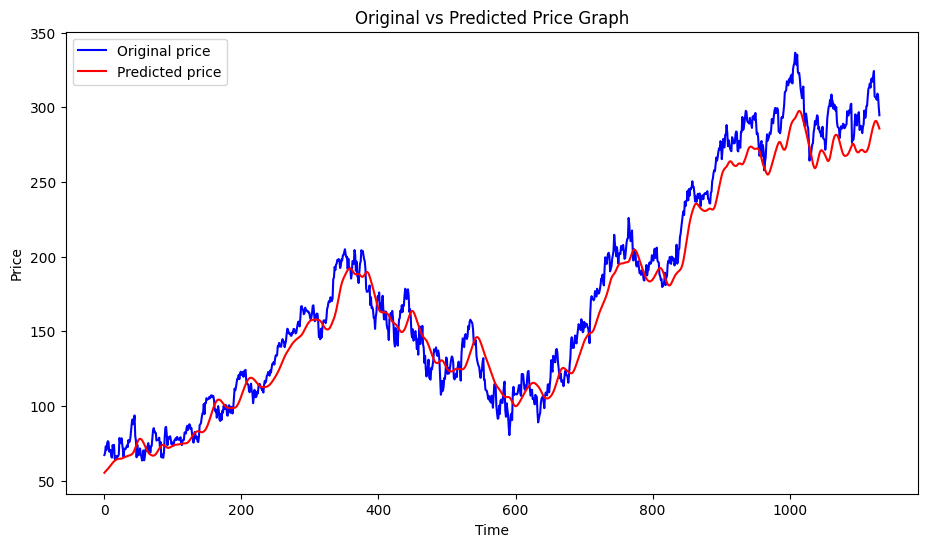

In [39]:
#Plotting the Original vs Predicted graph

plt.figure(figsize=(11,6))
plt.title('Original vs Predicted Price Graph')
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Time' , fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.legend()
plt.show()